<a href="https://colab.research.google.com/github/jacobpad/CS_Build_Week_1/blob/master/draft_CS_Build_Week_1_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

## Import & wrangle dataset

In [2]:
columns = [
           'id',
           'Clump Thickness',
           'Uniformity of Cell Size',
           'Uniformity of Cell Shape',
           'Marginal Adhesion',
           'Single Epithelial Cell Size',
           'Bare Nuclei',
           'Bland Chromatin',
           'Normal Nucleoli',
           'Mitoses',
           'Class'
           ]
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
url = 'https://raw.githubusercontent.com/jacobpad/random-datasets/master/breast-cancer-wisconsin.data'

df = pd.read_csv(url, names=columns)
df.replace('?', -99999, inplace=True)
df.drop(['id'], axis=1, inplace=True)

# Add "_"'s to the column names where spaces are:
def replace_spaces_with_underscore_in_column_names_and_make_lowercasee(df):
  """
  Accepts a dataframe.
  Alters column names replacing spaces with '_' and everything lowercase.
  """
  labels = list(df.columns)
  for i in range(len(df.columns)):
    labels[i] = labels[i].replace(' ', '_')
    labels[i] = labels[i].lower()
  df.columns = labels

  return df

df = replace_spaces_with_underscore_in_column_names_and_make_lowercasee(df)

print(df)

     clump_thickness  uniformity_of_cell_size  ...  mitoses  class
0                  5                        1  ...        1      2
1                  5                        4  ...        1      2
2                  3                        1  ...        1      2
3                  6                        8  ...        1      2
4                  4                        1  ...        1      2
..               ...                      ...  ...      ...    ...
694                3                        1  ...        1      2
695                2                        1  ...        1      2
696                5                       10  ...        2      4
697                4                        8  ...        1      4
698                4                        8  ...        1      4

[699 rows x 10 columns]


## Split dataset into X_train, X_test, y_train, y_test

In [3]:
# It's a huge list after this
features = df[['clump_thickness', 
               'uniformity_of_cell_size',
               'uniformity_of_cell_shape', 
               'marginal_adhesion',
               'single_epithelial_cell_size',
               'bare_nuclei', 
               'bland_chromatin',
               'normal_nucleoli',
               'mitoses']].astype(int).values.tolist()

target = df['class'].astype(int).values.tolist()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))
print(f'559 + 140 = {559 + 140}')

559
559
140
140
559 + 140 = 699


## Standardize data

In [4]:
from sklearn.preprocessing import StandardScaler

# Standardize the X stuff
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Sklearn build

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
s_pred = model.predict(X_test)
acc_score = accuracy_score(y_test, s_pred)
print(f'The sklearn accuracy: {acc_score}')

# predict = model.predict(X_train)
# print('\nConfusion Matrix:')
# print(confusion_matrix(y_train, predict),'\n')

The sklearn accuracy: 0.9714285714285714


---

## My Version

### Build Class

In [6]:
import pandas as pd
import numpy as np

class KNN:
    X_train = None
    y_train = None
    def __init__(self, K):
        self.K = K

    def fit(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, row1, row2):
        return np.linalg.norm(row1-row2)

    def predict(self, pred):

        predictions = []

        # iterates through each test row
        for p in pred:

            distances = []

            # every row in the training set
            for i, v in enumerate(self.X_train):

                # calc the euclidean distance between training row and test row
                distance = self.euclidean_distance(v, p)

                # append the distance to the distances list
                distances.append([distance, i])

            # sort the distances from least to greatest
            sorted_distances = sorted(distances)

            # take only smallest k distances
            k_distances = sorted_distances[:self.K]

            # predicted classification
            predict = [self.y_train[i[1]] for i in k_distances]

            # most frequent predicted element in predict
            result = max(set(predict), key = predict.count)

            # Append result to the predictions list
            predictions.append(result)

        # return the prediction
        return predictions

## Impliment Class and run accuracy score

In [7]:
model = KNN(K=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
my_acc_score = accuracy_score(y_test, y_pred)

print(f'My Class Accuracy: {my_acc_score}')

My Class Accuracy: 0.9714285714285714


# Blog Draft

# KNN - You’ve heard about it, but what is it?

K-NearestNeighbors, often called KNN for short, is a machine learning model used to generate predictions. And those predictions can be scored, outputing a percentage of how well the model did.

I’ll be using the [Breast Cancer Wisconsin (Original) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29) from UCI, but first lets go over some basics.

## Starting Small  

Here is a small, fake dataset with 14 dots. Are you able to make two groups out of them? 

```python
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

dataset = {'a':[[1,2],[3,1],[0,0],[4.25,1.5],[1,3],[2,3],[3,5]], 
           'b':[[6,5],[7,7],[7,4],[7.5,6.5],[7,5.5],[8,8],[8,6]]}

[[plt.scatter(ii[0], ii[1], s=100, color='navy') 
for ii in dataset[i]] for i in dataset];
```

![Original_Plot](https://raw.githubusercontent.com/jacobpad/jacobpad.github.io/master/img/CS_BW1/original%20plots.png)

I bet you could, but here's how I would do it.

![original seperated](https://raw.githubusercontent.com/jacobpad/jacobpad.github.io/master/img/CS_BW1/original%20seperated.png)

Now, let's introduce a new dot, the blue one. We'll place it at `[5,7]`

```python
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

# Data it bases it's predictions on
dataset = {'k':[[1,2],[3,1],[0,0],[4.25,1.5],[1,3],[2,3],[3,5]], 'r':[[6,5],[7,7],[7,4],[7.5,6.5],[7,5.5],[8,8],[8,6]]}

# Introducing something new
new_features = [5,7]

# One line it
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset];

# Add the new features
plt.scatter(new_features[0], new_features[1], s=100); # Blue
```

![blue_dot](https://raw.githubusercontent.com/jacobpad/jacobpad.github.io/master/img/CS_BW1/blue%20dot.png)

### Now for the big question...

Which group does the new blue dot belong in? 

If you say the bottom left, let me know why you say that. As for me, I would classify it to the upper right group, because it's closer to more of the red dots than black dots.

If you agree with me, congratulations, we've basically just done K-Nearest Neighbors.

But wait, what's the K?

K is whatever you want it to be, but because it often plays the role of a tie breaker, it should always be an odd number. Typically, K defaults at the number 5. But that still doesn't explain what it is. K is the number of closest dots that vote on what the new dot should be. They try to recruit it to their side. 

![black_red](https://raw.githubusercontent.com/jacobpad/jacobpad.github.io/master/img/CS_BW1/black_red.png)

## Let’s Build This Thing With The Cancer Dataset Mentioned Above

The code below will import the data into python for us and we'll be able to move forward from there.

```python
import pandas as pd

# The column names of the dataset
columns = [
           'id',
           'Clump Thickness',
           'Uniformity of Cell Size',
           'Uniformity of Cell Shape',
           'Marginal Adhesion',
           'Single Epithelial Cell Size',
           'Bare Nuclei',
           'Bland Chromatin',
           'Normal Nucleoli',
           'Mitoses',
           'Class'
           ]

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

df = pd.read_csv(url, names=columns)
df.replace('?', -99999, inplace=True)
df.drop(['id'], axis=1, inplace=True)

# A function with a big long name
def replace_spaces_with_underscore_in_column_names_and_make_lowercasee(df):
  """
  Accepts a dataframe.
  Alters column names- replacing spaces with '_' and column names lowercase.
  Returns a dataframe.
  """
  labels = list(df.columns)
  for i in range(len(df.columns)):
    labels[i] = labels[i].replace(' ', '_')
    labels[i] = labels[i].lower()
  df.columns = labels

  return df

# Invokes the function
df = replace_spaces_with_underscore_in_column_names_and_make_lowercasee(df)

# Shows a dataframe
print(df)
```

### Splitting The Dataframe

Now we need to split dataset into what we'll call "test/train/split" which will give us `X_train, X_test, y_train, y_test`. 

```python
# What the model uses to study on
features = df[['clump_thickness', 
               'uniformity_of_cell_size',
               'uniformity_of_cell_shape', 
               'marginal_adhesion',
               'single_epithelial_cell_size',
               'bare_nuclei', 
               'bland_chromatin',
               'normal_nucleoli',
               'mitoses']].astype(int).values.tolist()

# What the model tries to guess
target = df['class'].astype(int).values.tolist()

# Another import
from sklearn.model_selection import train_test_split

# Preform the split of the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)
```

Notice the last line, the `test_size` parameter is `.2`. That means we're setting aside 20% of the data for testing our results (think whether the blue dot should be red or balck). That's where the `X_test` and `y_test` come into play. Conversly, 80% of the data is to be used for training. Hence the name "train/test/split". (I know, it's so original)

The `features` are all the columns except the `target`. The target is what we want to be able to predict.

### Standardizing

What does standardizing mean? In short, it's bringing all the numbers closer. "Standardization makes all variables to contribute equally to the similarity measures." We'll only do this to the X_stuff though.

```python
# Another import
from sklearn.preprocessing import StandardScaler

# Standardize the X stuff
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
```
### Wait! Lets Cheat Real Quick

This code will give us a glimps of what we should expect when we've finished building our own class.

Lets run it, and then walk through it real quick.

```python
# Even more imports
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
s_pred = model.predict(X_test)
acc_score = accuracy_score(y_test, s_pred)
print(f'The sklearn accuracy: {acc_score}')
```

output:
```python
The sklearn accuracy: 0.9714285714285714
```

Okay, so what just happened? First of all, we had some imports to bring in. Then we instantiated our model, telling it to use the nearest 5 points by saying `n_neighbors=5`.

Then we had to fit it, which basically takes all the training data and crunches it down so we can have it ready for when it's needed next.

After fitting the model (the learning phase), we'll need to get what the computer thinks the predictions ought to be - we'll call it `s_pred` which will stand for sklearns prediction.

Next we come to generating an accuracy score (followed by printing it, which we see above). How well did SKLEARN do? Comparing the actual predictions to the generated ones, sklearn was 97.14% correct at "assigning the blue dots to the correct category" or in this case, 97.14% correctly identified the 20% we held out. Predicting which people had cancer, and which didn't. 

## Building Our Own Model To Try And Do The Same Thing

```python
import numpy as np

class KNN:
    X_train = None
    y_train = None
    def __init__(self, K):
        self.K = K

    def fit(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, row1, row2):
        return np.linalg.norm(row1-row2)

    def predict(self, pred):
        
        # Empty list
        predictions = []

        # Go through each row
        for p in pred:
            
            # Empty list
            distances = []

            # Every row in the training set
            for i, v in enumerate(self.X_train):

                # Get euclidean distance
                distance = self.euclidean_distance(v, p)

                # Append distance to list
                distances.append([distance, i])

            # Sort smallest to biggest
            sorted_distances = sorted(distances)

            # Slice getting K distances
            k_distances = sorted_distances[:self.K]

            # Predicted what it will be
            predict = [self.y_train[i[1]] for i in k_distances]

            # Tally the votes
            result = max(set(predict), key = predict.count)

            # Append result to the predictions list
            predictions.append(result)

        # return the prediction
        return predictions
```

That's a lot of code, lets look closer at it.

It's a class, which starts off by setting `X_train` and `y_train` to `None`. They'll come into play later.

Every class needs an `__init__` function, kinda like the class clown, somebody's gotta fill the roll. The `__init__` basically accepts `K` from the user. 

Then we've got the `fit` method, this is where the chrunching of the `X_train` and `y_train` come into play.

It's followed by the `euclidean_distance` method, which does some fancy linear algebra to figure out how far away the blue dot is from every other dot... (Remember the blue dot above?)

Next, and lastly comes the predict function, which was the hardest for me to figure out. But if you've followed along with everything I've said up to this point, the predict method shouldn't be that scary. 

Lets go backwards explaining this, starting at the bottom.

It returns predictions in thew form of a list, which comes from the different points (think dots) voting on who should join them. It's limited to only the closest `K` (5 in this case) which come from measuring the distance from every point in the training data. Phew! That's a lot!

### Let's Test The Class

Because we've seen this kind of code above, I won't explain every line.

```python
model = KNN(K=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
my_acc_score = accuracy_score(y_test, y_pred)

print(f'My Class Accuracy: {my_acc_score}')
```

First we instantiate our model using the class we just made, then, just like whe we ran it with sklearn's model, we fit, predict and get an accuracy score. 

## Conclusion

Let's run it and see what our score is, we'll use the same training data and the same testing data as above whe we ran it for the sklearn model. 

And we get...

output
```python
My Class Accuracy: 0.9714285714285714
```

The same exact score as the sklearn model! How amazing is that. 

Hopefully you understand K-Nearest Neighbors a bit better now. I know I sure do!

---

My code can be found [here](https://github.com/jacobpad/CS_Build_Week_1/blob/master/CS_Build_Week_1_KNN.ipynb)  
KNN [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)  
The sklearn class can be found [here](https://github.com/scikit-learn/scikit-learn/blob/fd237278e/sklearn/neighbors/_classification.py#L26)  
UCI [Breast Cancer Wisconsin (Original) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29)  

## Start small

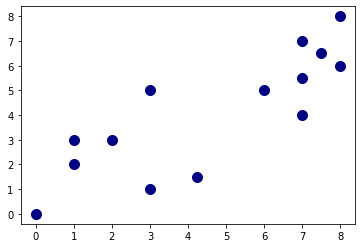

In [8]:
import matplotlib.pyplot as plt

dataset = {'a':[[1,2],[3,1],[0,0],[4.25,1.5],[1,3],[2,3],[3,5]], 
           'b':[[6,5],[7,7],[7,4],[7.5,6.5],[7,5.5],[8,8],[8,6]]}

[[plt.scatter(ii[0], ii[1], s=100, color='navy') 
for ii in dataset[i]] for i in dataset];

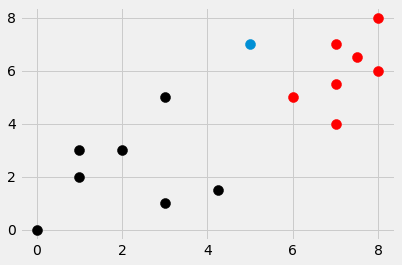

In [9]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

# Data it bases it's predictions on
dataset = {'k':[[1,2],[3,1],[0,0],[4.25,1.5],[1,3],[2,3],[3,5]], 'r':[[6,5],[7,7],[7,4],[7.5,6.5],[7,5.5],[8,8],[8,6]]}

# Introducing something new
new_features = [5,7]

# One line it
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset];

# Add the new features
plt.scatter(new_features[0], new_features[1], s=100); # Blue

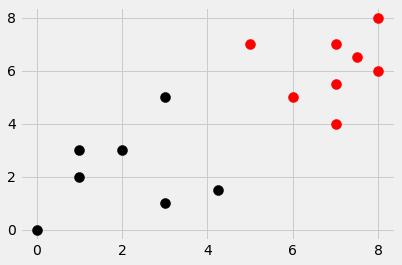

In [10]:
# One line it
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset];

# Add the new features
plt.scatter(new_features[0], new_features[1], color='red', s=100); # Blue